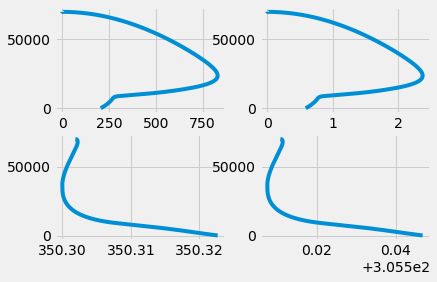

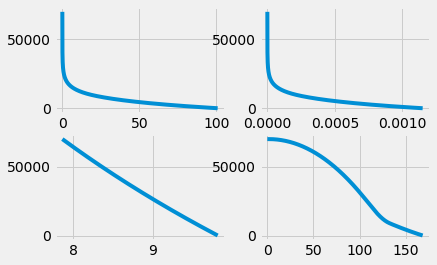

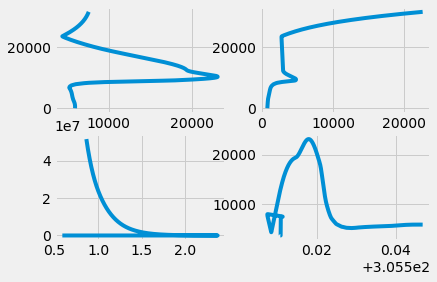

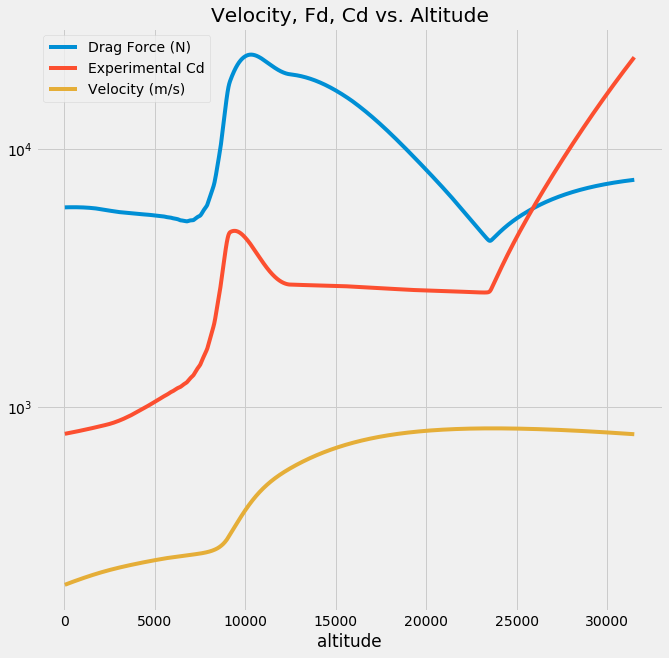

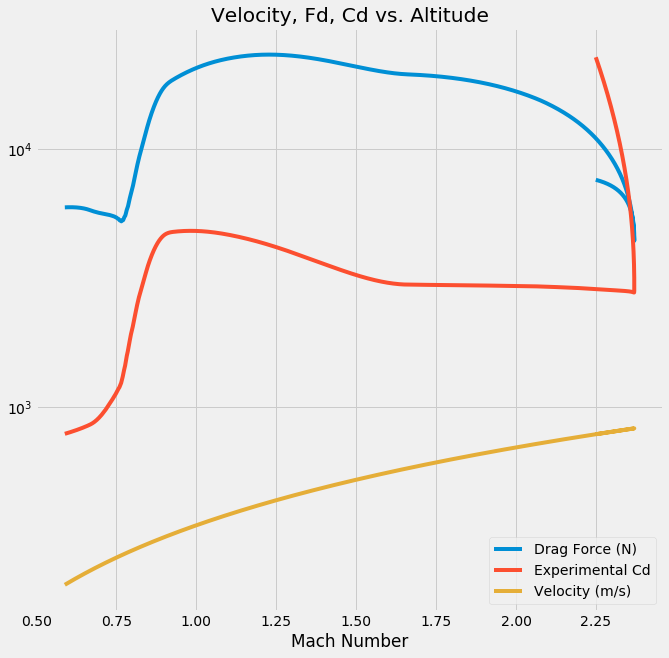

In [41]:
import csv
import random
import cmath as math
import matplotlib.pyplot as plt
from matplotlib import style

plt.style.use('fivethirtyeight')

# Set up constant variables
ship_mass = 477.49999165535 # kg
spec_gas_const = 286.9 # J / (kg * k)
crossArea = math.pi/4 * 0.625**2.0
body_mu = 3.5315984*10**12 # m^3/s^2
vess_length = 1

# Initialize readin variables
time = []
altitude = []
velocity = []
acceleration = []
pressure = []
temperature = []
gravity = []
density = []
dragForce = []
gravity = []
dragCoefficient = []
sound_speed = []
mach = []

# Read in values for variables

with open('mylog.csv','r') as mylog:
    csv_reader = csv.DictReader(mylog)
    
    next(csv_reader)
    
    for line in csv_reader:
        time.append(float(line['time']))
        altitude.append(float(line['altitude']))
        velocity.append(float(line['velocity']))
        acceleration.append(float(line['acc']))
        gravity.append(float(line['grav']))
        pressure.append(float(line['pres']))
        temperature.append(float(line['temp']))
        
time_zero = time[0]

for its in range(len(time)):
    time[its] = time[its] - time_zero
    density.append(pressure[its] / (temperature[its] * spec_gas_const))
    dragForce.append(ship_mass * (acceleration[its] + gravity[its]) - (math.pi / 4) * density[its] * 0.625**2 * vess_length * gravity[its])
    if density[its] * velocity[its] > 0:
        dragCoefficient.append((2 / velocity[its]**2) *
                                ((4 * ship_mass * (acceleration[its] + gravity[its]) /
                                (math.pi * density[its] * 0.625**2)) - vess_length * gravity[its]))
    else:
        dragCoefficient.append(0)
    sound_speed.append((1.4 * spec_gas_const * temperature[its])**(1/2))
    mach.append(velocity[its] / sound_speed[its])
    
# Atmospheric characterizations

fig_alt0 = plt.figure()
ax1 = fig_alt0.add_subplot(221)
ax2 = fig_alt0.add_subplot(222)
ax3 = fig_alt0.add_subplot(223)
ax4 = fig_alt0.add_subplot(224)

fig_alt1 = plt.figure()
ax5 = fig_alt1.add_subplot(221)
ax6 = fig_alt1.add_subplot(222)
ax7 = fig_alt1.add_subplot(223)
ax8 = fig_alt1.add_subplot(224)

fig_alt2 = plt.figure()
ax9 = fig_alt2.add_subplot(221)
ax10 = fig_alt2.add_subplot(222)
ax11 = fig_alt2.add_subplot(223)
ax12 = fig_alt2.add_subplot(224)

# Define axes

ax1.plot(velocity, altitude)
ax2.plot(mach, altitude)
ax3.plot(sound_speed, altitude)
ax4.plot(temperature, altitude)
ax7.plot(gravity, altitude)
ax6.plot(density, altitude)
ax5.plot(pressure, altitude)
ax8.plot(time, altitude)
ax9.plot(dragForce[5000:], altitude[5000:])
ax10.plot(dragCoefficient[5000:], altitude[5000:])
ax11.plot(mach[2000:], dragCoefficient[2000:])
ax12.plot(temperature, dragForce)
    
plt.show()

fig = plt.figure(figsize = (10,10))

ax1 = fig.add_subplot(111)

ax1.plot(altitude[5000:], dragForce[5000:], label = 'Drag Force (N)')
ax1.plot(altitude[5000:], dragCoefficient[5000:], label = 'Experimental Cd')
ax1.plot(altitude[5000:], velocity[5000:],  label = 'Velocity (m/s)')
ax1.legend()
ax1.set_xlabel('altitude')
plt.title('Velocity, Fd, Cd vs. Altitude')
plt.yscale('log')
plt.show()

fig = plt.figure(figsize = (10,10))

ax1 = fig.add_subplot(111)

ax1.plot(mach[5000:], dragForce[5000:], label = 'Drag Force (N)')
ax1.plot(mach[5000:], dragCoefficient[5000:], label = 'Experimental Cd')
ax1.plot(mach[5000:], velocity[5000:],  label = 'Velocity (m/s)')
ax1.legend()
ax1.set_xlabel('Mach Number')
plt.title('Velocity, Fd, Cd vs. Altitude')
plt.yscale('log')
plt.show()
